# Batch: simple vs RL tabular MM

Runs `mm_compare` for both `simple` and `rl_tabular` market makers over multiple seeds, then plots MTM PnL averages (with/without std bands) and summary stats.

In [109]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

# ---- parameters ----
run_simulations = True  # set False to skip running and just analyze existing logs
num_runs = 20           # seeds to run
base_seed = 1235      # RNG seed to generate seeds list
ticker = 'AAPL'
historical_date = '20000101'
start_time = '00:00:01'
end_time = '23:59:00'
mm_types = ['simple', 'rl_tabular']
log_root = Path('..') / 'log'
# --------------------

rng = np.random.default_rng(base_seed)
seeds = rng.integers(low=1, high=2**31-1, size=num_runs)
seeds

array([ 806646503,  381135408,  343922950,  393947090, 1013705456,
        919133052, 1286557514, 1799815223, 1220891673, 1775989971,
        329880161,  629672771,  683395659,  580529334, 1600192833,
       1274249933,  682927829,   66330568,  351335121, 1394992132])

## Run simulations

In [110]:
log_root.mkdir(exist_ok=True)
runs = []
if run_simulations:
    for mm in mm_types:
        for seed in seeds:
            run_name = f"{mm}_seed{seed}"
            cmd = [
                'python', 'abides.py',
                '-c', 'mm_compare',
                '-t', ticker,
                '-d', historical_date,
                '--start-time', start_time,
                '--end-time', end_time,
                '--seed', str(seed),
                '--log_dir', run_name,
                '--mm-type', mm,

            ]
            print('Running:', ' '.join(cmd))
            result = subprocess.run(cmd, cwd=Path('..'))
            runs.append({'mm': mm, 'seed': seed, 'log_dir': log_root / run_name, 'returncode': result.returncode})
else:
    runs = [{'mm': mm, 'seed': seed, 'log_dir': log_root / f"{mm}_seed{seed}", 'returncode': 0}
            for mm in mm_types for seed in seeds]
runs

Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 806646503 --log_dir simple_seed806646503 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:01:43.715175
Configuration seed: 806646503


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:26:24.346514387, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.702030 ---


--- Simulation time: 2000-01-01 06:47:02.490517426, messages processed: 200000, wallclock elapsed: 0 days 00:00:08.441228 ---


--- Simulation time: 2000-01-01 10:16:55.678299937, messages processed: 300000, wallclock elapsed: 0 days 00:00:14.334054 ---


--- Simulation time: 2000-01-01 13:43:25.701393458, messages processed: 400000, wallclock elapsed: 0 days 00:00:21.167663 ---


--- Simulation time: 2000-01-01 17:09:02.605440857, messages proces

Processing orderbook log: 100%|██████████| 84495/84495 [00:02<00:00, 41146.89it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.383716
Order book archival complete.
Event Queue elapsed: 0 days 00:00:49.233361, messages: 701213, messages per second: 14242.6
Mean ending value by agent type:
ValueAgent: 815800
MarketMakerAgent: -4078998
Simulation ending!
Simulation End Time: 2025-12-02 13:02:47.460219
Time taken to run simulation: 0:01:03.745044
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 381135408 --log_dir simple_seed381135408 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:02:50.456038
Configuration seed: 381135408


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:18:51.284761744, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.748479 ---


--- Simulation time: 2000-01-01 06:43:13.213351806, messages

Processing orderbook log: 100%|██████████| 85368/85368 [00:01<00:00, 45389.85it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.271368
Order book archival complete.
Event Queue elapsed: 0 days 00:01:00.290439, messages: 711450, messages per second: 11800.4
Mean ending value by agent type:
ValueAgent: 639227
MarketMakerAgent: -3196136
Simulation ending!
Simulation End Time: 2025-12-02 13:04:02.898870
Time taken to run simulation: 0:01:12.442832
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 343922950 --log_dir simple_seed343922950 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:04:05.502198
Configuration seed: 343922950


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:20:57.960803458, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.880133 ---


--- Simulation time: 2000-01-01 06:47:25.572585872, messages

Processing orderbook log: 100%|██████████| 84781/84781 [00:01<00:00, 44063.87it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.213346
Order book archival complete.
Event Queue elapsed: 0 days 00:00:54.217064, messages: 702902, messages per second: 12964.6
Mean ending value by agent type:
ValueAgent: 948324
MarketMakerAgent: -4741618
Simulation ending!
Simulation End Time: 2025-12-02 13:05:11.772993
Time taken to run simulation: 0:01:06.270795
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 393947090 --log_dir simple_seed393947090 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:05:14.253088
Configuration seed: 393947090


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000012 ---


--- Simulation time: 2000-01-01 03:21:20.893498400, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.959652 ---


--- Simulation time: 2000-01-01 06:43:33.364748999, messages

Processing orderbook log: 100%|██████████| 84799/84799 [00:01<00:00, 50678.82it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.638410
Order book archival complete.
Event Queue elapsed: 0 days 00:00:50.982517, messages: 709105, messages per second: 13908.8
Mean ending value by agent type:
ValueAgent: 761504
MarketMakerAgent: -3807518
Simulation ending!
Simulation End Time: 2025-12-02 13:06:16.477714
Time taken to run simulation: 0:01:02.224626
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1013705456 --log_dir simple_seed1013705456 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:06:18.538201
Configuration seed: 1013705456


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:25:04.468779768, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.681709 ---


--- Simulation time: 2000-01-01 06:48:34.321514260, messa

Processing orderbook log: 100%|██████████| 84702/84702 [00:01<00:00, 49931.44it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.736718
Order book archival complete.
Event Queue elapsed: 0 days 00:00:50.656992, messages: 703937, messages per second: 13896.1
Mean ending value by agent type:
ValueAgent: 855831
MarketMakerAgent: -4279155
Simulation ending!
Simulation End Time: 2025-12-02 13:07:20.427653
Time taken to run simulation: 0:01:01.889452
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 919133052 --log_dir simple_seed919133052 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:07:22.421393
Configuration seed: 919133052


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:25:26.463049456, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.607080 ---


--- Simulation time: 2000-01-01 06:46:41.874529650, messages

Processing orderbook log: 100%|██████████| 84614/84614 [00:01<00:00, 48700.72it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.448721
Order book archival complete.
Event Queue elapsed: 0 days 00:00:49.562979, messages: 704578, messages per second: 14215.8
Mean ending value by agent type:
ValueAgent: 701082
MarketMakerAgent: -3505410
Simulation ending!
Simulation End Time: 2025-12-02 13:08:22.951665
Time taken to run simulation: 0:01:00.530272
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1286557514 --log_dir simple_seed1286557514 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:08:24.995898
Configuration seed: 1286557514


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:24:02.229816126, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.727575 ---


--- Simulation time: 2000-01-01 06:50:21.605656662, messa

Processing orderbook log: 100%|██████████| 84342/84342 [00:01<00:00, 46412.29it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.107155
Order book archival complete.
Event Queue elapsed: 0 days 00:00:50.061097, messages: 696953, messages per second: 13922.0
Mean ending value by agent type:
ValueAgent: 855662
MarketMakerAgent: -4278311
Simulation ending!
Simulation End Time: 2025-12-02 13:09:26.822581
Time taken to run simulation: 0:01:01.826683
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1799815223 --log_dir simple_seed1799815223 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:09:28.957676
Configuration seed: 1799815223


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:22:46.399727860, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.579716 ---


--- Simulation time: 2000-01-01 06:48:17.154900695, messa

Processing orderbook log: 100%|██████████| 84784/84784 [00:01<00:00, 43202.39it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.799675
Order book archival complete.
Event Queue elapsed: 0 days 00:00:48.895952, messages: 704001, messages per second: 14397.9
Mean ending value by agent type:
ValueAgent: 956880
MarketMakerAgent: -4784399
Simulation ending!
Simulation End Time: 2025-12-02 13:10:29.037496
Time taken to run simulation: 0:01:00.079820
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1220891673 --log_dir simple_seed1220891673 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:10:31.127727
Configuration seed: 1220891673


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:24:35.785563768, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.652952 ---


--- Simulation time: 2000-01-01 06:48:34.371559992, messa

Processing orderbook log: 100%|██████████| 84651/84651 [00:01<00:00, 44716.02it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.696389
Order book archival complete.
Event Queue elapsed: 0 days 00:00:57.797047, messages: 703622, messages per second: 12174.0
Mean ending value by agent type:
ValueAgent: 845147
MarketMakerAgent: -4225736
Simulation ending!
Simulation End Time: 2025-12-02 13:11:40.529706
Time taken to run simulation: 0:01:09.401979
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1775989971 --log_dir simple_seed1775989971 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:11:43.008823
Configuration seed: 1775989971


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:25:38.703406132, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.682222 ---


--- Simulation time: 2000-01-01 06:45:57.187372526, messa

Processing orderbook log: 100%|██████████| 85162/85162 [00:02<00:00, 40525.85it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.190896
Order book archival complete.
Event Queue elapsed: 0 days 00:00:49.363273, messages: 707122, messages per second: 14324.9
Mean ending value by agent type:
ValueAgent: 803126
MarketMakerAgent: -4015632
Simulation ending!
Simulation End Time: 2025-12-02 13:12:44.316854
Time taken to run simulation: 0:01:01.308031
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 329880161 --log_dir simple_seed329880161 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:12:46.649586
Configuration seed: 329880161


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:20:09.038431231, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.671940 ---


--- Simulation time: 2000-01-01 06:43:53.394228678, messages

Processing orderbook log: 100%|██████████| 85124/85124 [00:01<00:00, 47752.99it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.105570
Order book archival complete.
Event Queue elapsed: 0 days 00:00:50.849861, messages: 711829, messages per second: 13998.6
Mean ending value by agent type:
ValueAgent: 750993
MarketMakerAgent: -3754964
Simulation ending!
Simulation End Time: 2025-12-02 13:13:49.207655
Time taken to run simulation: 0:01:02.558069
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 629672771 --log_dir simple_seed629672771 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:13:51.319680
Configuration seed: 629672771


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:20:49.925176960, messages processed: 100000, wallclock elapsed: 0 days 00:00:04.236645 ---


--- Simulation time: 2000-01-01 06:50:00.260812210, messages

Processing orderbook log: 100%|██████████| 84858/84858 [00:01<00:00, 47469.00it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.571651
Order book archival complete.
Event Queue elapsed: 0 days 00:00:50.379951, messages: 708629, messages per second: 14065.7
Mean ending value by agent type:
ValueAgent: 742787
MarketMakerAgent: -3713934
Simulation ending!
Simulation End Time: 2025-12-02 13:14:52.851211
Time taken to run simulation: 0:01:01.531531
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 683395659 --log_dir simple_seed683395659 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:14:54.932797
Configuration seed: 683395659


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:22:13.054462242, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.678960 ---


--- Simulation time: 2000-01-01 06:45:22.124034464, messages

Processing orderbook log: 100%|██████████| 85251/85251 [00:01<00:00, 45647.33it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.627891
Order book archival complete.
Event Queue elapsed: 0 days 00:00:49.914811, messages: 703672, messages per second: 14097.5
Mean ending value by agent type:
ValueAgent: 814314
MarketMakerAgent: -4071572
Simulation ending!
Simulation End Time: 2025-12-02 13:15:56.455484
Time taken to run simulation: 0:01:01.522687
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 580529334 --log_dir simple_seed580529334 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:15:58.646353
Configuration seed: 580529334


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:20:00.524951962, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.723971 ---


--- Simulation time: 2000-01-01 06:40:42.517917694, messages

Processing orderbook log: 100%|██████████| 85410/85410 [00:01<00:00, 45881.17it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.217356
Order book archival complete.
Event Queue elapsed: 0 days 00:00:53.443063, messages: 714298, messages per second: 13365.6
Mean ending value by agent type:
ValueAgent: 455533
MarketMakerAgent: -2277665
Simulation ending!
Simulation End Time: 2025-12-02 13:17:03.214974
Time taken to run simulation: 0:01:04.568621
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1600192833 --log_dir simple_seed1600192833 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:17:05.943605
Configuration seed: 1600192833


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:21:35.782550670, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.683936 ---


--- Simulation time: 2000-01-01 06:40:49.472405898, messa

Processing orderbook log: 100%|██████████| 85211/85211 [00:01<00:00, 45635.61it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.445278
Order book archival complete.
Event Queue elapsed: 0 days 00:00:49.805224, messages: 707013, messages per second: 14195.6
Mean ending value by agent type:
ValueAgent: 841834
MarketMakerAgent: -4209172
Simulation ending!
Simulation End Time: 2025-12-02 13:18:07.299689
Time taken to run simulation: 0:01:01.356084
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1274249933 --log_dir simple_seed1274249933 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:18:09.552180
Configuration seed: 1274249933


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:24:14.458060647, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.721651 ---


--- Simulation time: 2000-01-01 06:45:10.385671652, messa

Processing orderbook log: 100%|██████████| 85152/85152 [00:01<00:00, 43968.12it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.100474
Order book archival complete.
Event Queue elapsed: 0 days 00:00:51.279285, messages: 709579, messages per second: 13837.5
Mean ending value by agent type:
ValueAgent: 831073
MarketMakerAgent: -4155364
Simulation ending!
Simulation End Time: 2025-12-02 13:19:13.205755
Time taken to run simulation: 0:01:03.653575
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 682927829 --log_dir simple_seed682927829 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:19:17.130523
Configuration seed: 682927829


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:25:35.779317796, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.676535 ---


--- Simulation time: 2000-01-01 06:53:25.673643595, messages

Processing orderbook log: 100%|██████████| 84374/84374 [00:01<00:00, 44351.02it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.847320
Order book archival complete.
Event Queue elapsed: 0 days 00:00:47.304202, messages: 698248, messages per second: 14760.8
Mean ending value by agent type:
ValueAgent: 804058
MarketMakerAgent: -4020291
Simulation ending!
Simulation End Time: 2025-12-02 13:20:16.517593
Time taken to run simulation: 0:00:59.387070
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 66330568 --log_dir simple_seed66330568 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:20:18.778183
Configuration seed: 66330568


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:24:12.248510560, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.663666 ---


--- Simulation time: 2000-01-01 06:47:17.142038959, messages pr

Processing orderbook log: 100%|██████████| 84298/84298 [00:01<00:00, 45635.14it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.123247
Order book archival complete.
Event Queue elapsed: 0 days 00:00:48.511935, messages: 699351, messages per second: 14416.1
Mean ending value by agent type:
ValueAgent: 1048000
MarketMakerAgent: -5240002
Simulation ending!
Simulation End Time: 2025-12-02 13:21:19.477132
Time taken to run simulation: 0:01:00.698949
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 351335121 --log_dir simple_seed351335121 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:21:21.715534
Configuration seed: 351335121


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:28:13.537457438, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.898856 ---


--- Simulation time: 2000-01-01 06:52:55.515186314, message

Processing orderbook log: 100%|██████████| 84558/84558 [00:01<00:00, 45294.68it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.519519
Order book archival complete.
Event Queue elapsed: 0 days 00:00:51.282487, messages: 701538, messages per second: 13679.9
Mean ending value by agent type:
ValueAgent: 930866
MarketMakerAgent: -4654331
Simulation ending!
Simulation End Time: 2025-12-02 13:22:24.416140
Time taken to run simulation: 0:01:02.700606
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1394992132 --log_dir simple_seed1394992132 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:22:26.653508
Configuration seed: 1394992132


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:24:02.231051182, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.680290 ---


--- Simulation time: 2000-01-01 06:54:47.036163027, messa

Processing orderbook log: 100%|██████████| 83542/83542 [00:01<00:00, 43783.00it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.989342
Order book archival complete.
Event Queue elapsed: 0 days 00:00:47.997792, messages: 692836, messages per second: 14434.7
Mean ending value by agent type:
ValueAgent: 1044354
MarketMakerAgent: -5221770
Simulation ending!
Simulation End Time: 2025-12-02 13:23:28.055071
Time taken to run simulation: 0:01:01.401563
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 806646503 --log_dir rl_tabular_seed806646503 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:23:30.184318
Configuration seed: 806646503


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:49:47.406280214, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.789687 ---


--- Simulation time: 2000-01-01 07:50:55.428459776,

Processing orderbook log: 100%|██████████| 73731/73731 [00:01<00:00, 38984.98it/s]


Order book logging complete!
Time taken to log the order book: 0:00:08.053879
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.681677, messages: 613204, messages per second: 16716.9
Mean ending value by agent type:
ValueAgent: 577653
RLTabularMarketMakerAgent: -2888267
Simulation ending!
Simulation End Time: 2025-12-02 13:24:19.199321
Time taken to run simulation: 0:00:49.015003
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 381135408 --log_dir rl_tabular_seed381135408 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:24:21.216437
Configuration seed: 381135408


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 04:06:19.014547536, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.877251 ---


--- Simulation time: 2000-01-01 07:57:21.33

Processing orderbook log: 100%|██████████| 73650/73650 [00:01<00:00, 39400.43it/s]


Order book logging complete!
Time taken to log the order book: 0:00:08.141024
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.143232, messages: 610940, messages per second: 16903.3
Mean ending value by agent type:
ValueAgent: 419207
RLTabularMarketMakerAgent: -2096036
Simulation ending!
Simulation End Time: 2025-12-02 13:25:09.837273
Time taken to run simulation: 0:00:48.620836
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 343922950 --log_dir rl_tabular_seed343922950 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:25:11.716712
Configuration seed: 343922950


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000008 ---


--- Simulation time: 2000-01-01 04:03:27.022314123, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.806012 ---


--- Simulation time: 2000-01-01 07:50:57.13

Processing orderbook log: 100%|██████████| 73887/73887 [00:01<00:00, 39731.41it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.701418
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.120053, messages: 616169, messages per second: 17058.9
Mean ending value by agent type:
ValueAgent: 601018
RLTabularMarketMakerAgent: -3005090
Simulation ending!
Simulation End Time: 2025-12-02 13:25:59.854866
Time taken to run simulation: 0:00:48.138154
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 393947090 --log_dir rl_tabular_seed393947090 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:26:01.762380
Configuration seed: 393947090


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 04:02:54.904416169, messages processed: 100000, wallclock elapsed: 0 days 00:00:04.002890 ---


--- Simulation time: 2000-01-01 07:58:52.26

Processing orderbook log: 100%|██████████| 72939/72939 [00:01<00:00, 39527.66it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.608458
Order book archival complete.
Event Queue elapsed: 0 days 00:00:35.357940, messages: 607837, messages per second: 17191.0
Mean ending value by agent type:
ValueAgent: 330967
RLTabularMarketMakerAgent: -1654834
Simulation ending!
Simulation End Time: 2025-12-02 13:26:48.834926
Time taken to run simulation: 0:00:47.072546
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1013705456 --log_dir rl_tabular_seed1013705456 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:26:50.788465
Configuration seed: 1013705456


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:58:11.126587128, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.830116 ---


--- Simulation time: 2000-01-01 07:57:54

Processing orderbook log: 100%|██████████| 74259/74259 [00:01<00:00, 41320.12it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.796850
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.827390, messages: 616768, messages per second: 16747.5
Mean ending value by agent type:
ValueAgent: 757072
RLTabularMarketMakerAgent: -3785360
Simulation ending!
Simulation End Time: 2025-12-02 13:27:39.752208
Time taken to run simulation: 0:00:48.963743
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 919133052 --log_dir rl_tabular_seed919133052 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:27:42.890829
Configuration seed: 919133052


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 04:07:24.217642778, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.852805 ---


--- Simulation time: 2000-01-01 08:04:01.62

Processing orderbook log: 100%|██████████| 73385/73385 [00:01<00:00, 41079.48it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.419371
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.050757, messages: 609514, messages per second: 16907.1
Mean ending value by agent type:
ValueAgent: 470341
RLTabularMarketMakerAgent: -2351703
Simulation ending!
Simulation End Time: 2025-12-02 13:28:30.609710
Time taken to run simulation: 0:00:47.718881
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1286557514 --log_dir rl_tabular_seed1286557514 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:28:32.491138
Configuration seed: 1286557514


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 04:07:08.023750844, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.792487 ---


--- Simulation time: 2000-01-01 08:02:47

Processing orderbook log: 100%|██████████| 73826/73826 [00:01<00:00, 39206.71it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.983235
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.336030, messages: 613158, messages per second: 16874.7
Mean ending value by agent type:
ValueAgent: 443271
RLTabularMarketMakerAgent: -2216357
Simulation ending!
Simulation End Time: 2025-12-02 13:29:20.810460
Time taken to run simulation: 0:00:48.319322
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1799815223 --log_dir rl_tabular_seed1799815223 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:29:22.698880
Configuration seed: 1799815223


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:55:28.324917545, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.781895 ---


--- Simulation time: 2000-01-01 07:56:28

Processing orderbook log: 100%|██████████| 73878/73878 [00:01<00:00, 41444.45it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.498142
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.541271, messages: 613961, messages per second: 16801.9
Mean ending value by agent type:
ValueAgent: 533369
RLTabularMarketMakerAgent: -2666844
Simulation ending!
Simulation End Time: 2025-12-02 13:30:10.909145
Time taken to run simulation: 0:00:48.210265
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1220891673 --log_dir rl_tabular_seed1220891673 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:30:13.079546
Configuration seed: 1220891673


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:56:29.306053808, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.799704 ---


--- Simulation time: 2000-01-01 07:57:11

Processing orderbook log: 100%|██████████| 72450/72450 [00:01<00:00, 39228.08it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.628986
Order book archival complete.
Event Queue elapsed: 0 days 00:00:35.107395, messages: 604453, messages per second: 17217.3
Mean ending value by agent type:
ValueAgent: 562325
RLTabularMarketMakerAgent: -2811625
Simulation ending!
Simulation End Time: 2025-12-02 13:30:59.039771
Time taken to run simulation: 0:00:45.960225
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1775989971 --log_dir rl_tabular_seed1775989971 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:31:00.877066
Configuration seed: 1775989971


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000005 ---


--- Simulation time: 2000-01-01 04:33:27.100258816, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.917937 ---


--- Simulation time: 2000-01-01 08:38:43

Processing orderbook log: 100%|██████████| 70704/70704 [00:01<00:00, 37165.97it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.959536
Order book archival complete.
Event Queue elapsed: 0 days 00:05:45.564988, messages: 589401, messages per second: 1705.6
Mean ending value by agent type:
ValueAgent: 432199
RLTabularMarketMakerAgent: -2160996
Simulation ending!
Simulation End Time: 2025-12-02 13:36:57.989163
Time taken to run simulation: 0:05:57.112097
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 329880161 --log_dir rl_tabular_seed329880161 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:37:00.276186
Configuration seed: 329880161


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:52:26.111565822, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.958416 ---


--- Simulation time: 2000-01-01 07:36:28.961

Processing orderbook log: 100%|██████████| 74438/74438 [00:01<00:00, 37836.89it/s]


Order book logging complete!
Time taken to log the order book: 0:00:08.795718
Order book archival complete.
Event Queue elapsed: 0 days 00:00:38.596679, messages: 618911, messages per second: 16035.3
Mean ending value by agent type:
ValueAgent: 478770
RLTabularMarketMakerAgent: -2393848
Simulation ending!
Simulation End Time: 2025-12-02 13:37:53.061632
Time taken to run simulation: 0:00:52.785446
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 629672771 --log_dir rl_tabular_seed629672771 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:37:55.376501
Configuration seed: 629672771


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:58:18.777184320, messages processed: 100000, wallclock elapsed: 0 days 00:00:04.084190 ---


--- Simulation time: 2000-01-01 07:58:48.66

Processing orderbook log: 100%|██████████| 70645/70645 [00:01<00:00, 38739.56it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.707951
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.771485, messages: 589924, messages per second: 16043.0
Mean ending value by agent type:
ValueAgent: 470021
RLTabularMarketMakerAgent: -2350104
Simulation ending!
Simulation End Time: 2025-12-02 13:38:42.968515
Time taken to run simulation: 0:00:47.592014
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 683395659 --log_dir rl_tabular_seed683395659 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:38:45.003394
Configuration seed: 683395659


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 04:06:14.998355578, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.824970 ---


--- Simulation time: 2000-01-01 08:08:53.38

Processing orderbook log: 100%|██████████| 72006/72006 [00:01<00:00, 38072.95it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.739819
Order book archival complete.
Event Queue elapsed: 0 days 00:00:35.146098, messages: 598882, messages per second: 17039.8
Mean ending value by agent type:
ValueAgent: 544322
RLTabularMarketMakerAgent: -2721609
Simulation ending!
Simulation End Time: 2025-12-02 13:39:31.317321
Time taken to run simulation: 0:00:46.313927
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 580529334 --log_dir rl_tabular_seed580529334 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:39:33.466962
Configuration seed: 580529334


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 04:08:14.855423889, messages processed: 100000, wallclock elapsed: 0 days 00:00:04.008510 ---


--- Simulation time: 2000-01-01 08:14:08.62

Processing orderbook log: 100%|██████████| 69877/69877 [00:01<00:00, 39670.03it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.213539
Order book archival complete.
Event Queue elapsed: 0 days 00:00:34.984988, messages: 582178, messages per second: 16640.8
Mean ending value by agent type:
ValueAgent: 440101
RLTabularMarketMakerAgent: -2200505
Simulation ending!
Simulation End Time: 2025-12-02 13:40:18.828116
Time taken to run simulation: 0:00:45.361154
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1600192833 --log_dir rl_tabular_seed1600192833 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:40:21.269016
Configuration seed: 1600192833


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000005 ---


--- Simulation time: 2000-01-01 03:55:49.103459956, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.804275 ---


--- Simulation time: 2000-01-01 08:05:01

Processing orderbook log: 100%|██████████| 72619/72619 [00:01<00:00, 41455.28it/s]


Order book logging complete!
Time taken to log the order book: 0:00:06.739527
Order book archival complete.
Event Queue elapsed: 0 days 00:00:35.183007, messages: 605169, messages per second: 17200.6
Mean ending value by agent type:
ValueAgent: 480401
RLTabularMarketMakerAgent: -2402005
Simulation ending!
Simulation End Time: 2025-12-02 13:41:07.290000
Time taken to run simulation: 0:00:46.020984
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1274249933 --log_dir rl_tabular_seed1274249933 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:41:09.573125
Configuration seed: 1274249933


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 04:07:46.022413318, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.831959 ---


--- Simulation time: 2000-01-01 08:00:42

Processing orderbook log: 100%|██████████| 72407/72407 [00:01<00:00, 40800.70it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.848487
Order book archival complete.
Event Queue elapsed: 0 days 00:00:34.827986, messages: 604223, messages per second: 17348.8
Mean ending value by agent type:
ValueAgent: 544888
RLTabularMarketMakerAgent: -2724441
Simulation ending!
Simulation End Time: 2025-12-02 13:41:56.155845
Time taken to run simulation: 0:00:46.582720
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 682927829 --log_dir rl_tabular_seed682927829 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:41:58.256456
Configuration seed: 682927829


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:46:56.553477120, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.818095 ---


--- Simulation time: 2000-01-01 07:38:11.94

Processing orderbook log: 100%|██████████| 74821/74821 [00:01<00:00, 40222.41it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.326035
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.050865, messages: 621019, messages per second: 17226.2
Mean ending value by agent type:
ValueAgent: 584466
RLTabularMarketMakerAgent: -2922331
Simulation ending!
Simulation End Time: 2025-12-02 13:42:45.745362
Time taken to run simulation: 0:00:47.488906
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 66330568 --log_dir rl_tabular_seed66330568 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:42:47.918983
Configuration seed: 66330568


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 04:00:02.748984622, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.799760 ---


--- Simulation time: 2000-01-01 08:08:41.81184

Processing orderbook log: 100%|██████████| 73697/73697 [00:01<00:00, 37721.74it/s]


Order book logging complete!
Time taken to log the order book: 0:00:08.042939
Order book archival complete.
Event Queue elapsed: 0 days 00:00:36.188484, messages: 613132, messages per second: 16942.7
Mean ending value by agent type:
ValueAgent: 715236
RLTabularMarketMakerAgent: -3576182
Simulation ending!
Simulation End Time: 2025-12-02 13:43:36.620333
Time taken to run simulation: 0:00:48.701350
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 351335121 --log_dir rl_tabular_seed351335121 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:43:38.943074
Configuration seed: 351335121


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000006 ---


--- Simulation time: 2000-01-01 03:58:44.132191944, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.809493 ---


--- Simulation time: 2000-01-01 07:59:36.50

Processing orderbook log: 100%|██████████| 73166/73166 [00:01<00:00, 38041.94it/s]


Order book logging complete!
Time taken to log the order book: 0:00:07.420904
Order book archival complete.
Event Queue elapsed: 0 days 00:00:35.833848, messages: 609265, messages per second: 17002.5
Mean ending value by agent type:
ValueAgent: 702518
RLTabularMarketMakerAgent: -3512592
Simulation ending!
Simulation End Time: 2025-12-02 13:44:26.397388
Time taken to run simulation: 0:00:47.454314
Running: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 23:59:00 --seed 1394992132 --log_dir rl_tabular_seed1394992132 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 13:44:28.677408
Configuration seed: 1394992132


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000007 ---


--- Simulation time: 2000-01-01 03:51:36.450426632, messages processed: 100000, wallclock elapsed: 0 days 00:00:03.912083 ---


--- Simulation time: 2000-01-01 07:54:55

Processing orderbook log: 100%|██████████| 74199/74199 [00:01<00:00, 38303.65it/s]


Order book logging complete!
Time taken to log the order book: 0:00:08.763395
Order book archival complete.
Event Queue elapsed: 0 days 00:00:37.164917, messages: 617514, messages per second: 16615.5
Mean ending value by agent type:
ValueAgent: 702189
RLTabularMarketMakerAgent: -3510947
Simulation ending!
Simulation End Time: 2025-12-02 13:45:19.676047
Time taken to run simulation: 0:00:50.998639


[{'mm': 'simple',
  'seed': 806646503,
  'log_dir': PosixPath('../log/simple_seed806646503'),
  'returncode': 0},
 {'mm': 'simple',
  'seed': 381135408,
  'log_dir': PosixPath('../log/simple_seed381135408'),
  'returncode': 0},
 {'mm': 'simple',
  'seed': 343922950,
  'log_dir': PosixPath('../log/simple_seed343922950'),
  'returncode': 0},
 {'mm': 'simple',
  'seed': 393947090,
  'log_dir': PosixPath('../log/simple_seed393947090'),
  'returncode': 0},
 {'mm': 'simple',
  'seed': 1013705456,
  'log_dir': PosixPath('../log/simple_seed1013705456'),
  'returncode': 0},
 {'mm': 'simple',
  'seed': 919133052,
  'log_dir': PosixPath('../log/simple_seed919133052'),
  'returncode': 0},
 {'mm': 'simple',
  'seed': 1286557514,
  'log_dir': PosixPath('../log/simple_seed1286557514'),
  'returncode': 0},
 {'mm': 'simple',
  'seed': 1799815223,
  'log_dir': PosixPath('../log/simple_seed1799815223'),
  'returncode': 0},
 {'mm': 'simple',
  'seed': 1220891673,
  'log_dir': PosixPath('../log/simple_seed

## Load MTM series

In [111]:
def load_mtm_series(log_dir, pattern):
    files = list(log_dir.glob(pattern))
    if not files:
        return None
    df = pd.read_pickle(files[0])
    states = df[df['EventType'] == 'STATE']
    if states.empty:
        return None
    s = pd.DataFrame(list(states['Event']))
    s = s.set_index('time')
    s.index = pd.to_datetime(s.index)
    return s['mtm'].sort_index()

mtm_series = {mm: [] for mm in mm_types}
for run in runs:
    if run['returncode'] != 0:
        print('Skipping failed run', run)
        continue
    mm = run['mm']
    pattern = 'RL_TABULAR_MARKET_MAKER_AGENT_*.bz2' if mm == 'rl_tabular' else 'MARKET_MAKER_AGENT_*.bz2'
    series = load_mtm_series(run['log_dir'], pattern)
    if series is not None:
        mtm_series[mm].append({'seed': run['seed'], 'series': series})

mtm_series

{'simple': [{'seed': 806646503,
   'series': time
   2000-01-01 00:00:04.003872896    10000000
   2000-01-01 00:00:07.007745792    10000000
   2000-01-01 00:00:10.011618688    10000000
   2000-01-01 00:00:13.015491584    10000005
   2000-01-01 00:00:16.019364480     9999996
                                      ...   
   2000-01-01 23:58:49.303158144     5921107
   2000-01-01 23:58:52.307031040     5921107
   2000-01-01 23:58:55.310903936     5921132
   2000-01-01 23:58:58.314776832     5921054
   2000-01-01 23:59:01.318649728     5921054
   Name: mtm, Length: 28743, dtype: int64},
  {'seed': 381135408,
   'series': time
   2000-01-01 00:00:04.004351652    10000000
   2000-01-01 00:00:07.008703304    10000000
   2000-01-01 00:00:10.013054956    10000028
   2000-01-01 00:00:13.017406608    10000028
   2000-01-01 00:00:16.021758260    10000035
                                      ...   
   2000-01-01 23:58:48.040368568     6803864
   2000-01-01 23:58:51.044720220     6803864
   2000-01-

## MTM mean/std over time (aligned)

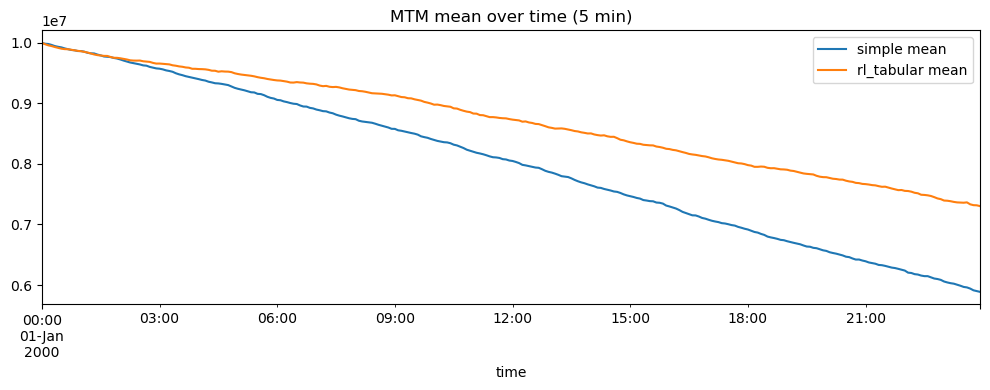

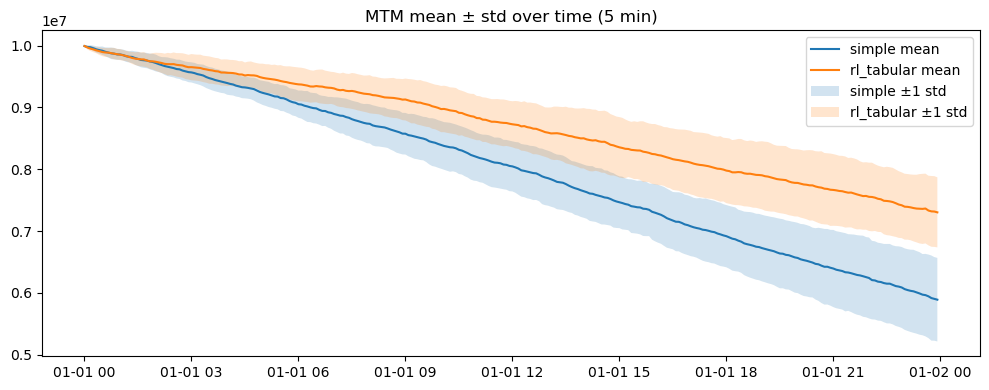

In [112]:
def align_and_stats(series_list, freq='5T'):
    if not series_list:
        return None, None
    aligned = []
    for item in series_list:
        res = item['series'].resample(freq).last()
        aligned.append(res)
    df = pd.concat(aligned, axis=1)
    mean = df.mean(axis=1)
    std = df.std(axis=1)
    return mean, std

stats_over_time = {}
for mm in mm_types:
    mean, std = align_and_stats(mtm_series[mm])
    stats_over_time[mm] = {'mean': mean, 'std': std}

plt.figure(figsize=(10,4))
for mm in mm_types:
    data = stats_over_time[mm]
    if data['mean'] is not None:
        data['mean'].plot(label=f"{mm} mean")
plt.title('MTM mean over time (5 min)')

plt.legend()
plt.tight_layout()

plt.figure(figsize=(10,4))
for mm in mm_types:
    data = stats_over_time[mm]
    if data['mean'] is not None:
        m = data['mean']
        s = data['std']
        plt.plot(m.index, m, label=f"{mm} mean")
        plt.fill_between(m.index, m - s, m + s, alpha=0.2, label=f"{mm} ±1 std")
plt.title('MTM mean ± std over time (5 min)')
plt.legend()
plt.tight_layout()

## Summary tables (final PnL)

In [113]:
def final_pnl(series):
    if series is None or series.empty:
        return None
    return series.iloc[-1] - series.iloc[0]

records = []
for mm in mm_types:
    for item in mtm_series[mm]:
        pnl = final_pnl(item['series'])
        if pnl is not None:
            records.append({'mm': mm, 'seed': item['seed'], 'pnl': pnl})

pnl_df = pd.DataFrame(records)
pnl_df.head()


,mm,seed,pnl
0,simple,806646503,-4078946.0
1,simple,381135408,-3195590.0
2,simple,343922950,-4741831.0
3,simple,393947090,-3808004.0
4,simple,1013705456,-4278900.0


In [114]:
if not pnl_df.empty:
    summary = pnl_df.groupby('mm')['pnl'].agg(['mean', 'std', 'median', 'min', 'max', 'count'])
    display(summary)
else:
    print('No PnL data to summarize')

,mean,std,median,min,max,count
mm,,,,,,
rl_tabular,-2697738.375,567149.961468,-2695411.0,-3785145.0,-1654778.0,20
simple,-4111781.450,676622.688954,-4117035.0,-5240078.0,-2277476.0,20
